<b>AIRLINES QUESTION 

All airlines questions expect answers that use the Dataframes API (Scala or Python). SQL only answers are accepted but may receive reduced points. We will not accept answers that use the RDD API.

dataset path :- (dbutils.fs.ls('/databricks-datasets/airlines/')) -- Please use the first 200 files in your dataset and to answer your questions

Note: Provide written descriptions for all code written. 

1. Write code that uses the DataFrame API to read in the entire airlines data set with clearly named columns. – 5pts 

2. How many unique airlines are present in this dataset?- 5pts 

3. Which airline is delayed on departure most often? Show a bar graph of the top five most delayed airlines 

4. A.  What was the average arrival delay per airline? 

   B. Also, for each airline, on average did flights arrive early or late? 

Calculate the average arrival delay per airline. Then, add a column to this new dataframe (containing the grouped averages) that contains the string "Late" if the average arrival for that airline arrive >15 minutes late, "Early" if the average arrival is <0 minutes late, and "On-time" if the average arrival is between 0 and 15 minutes late. 

 

To add the additional column, use a Spark UDF. Additionally, make sure to filter out or fill in null values in your dataframe (if there are any) prior to applying the UDF. 

5. What file format is airlines data stored in( It was stored in CSV format), and was this the most optimal format for the questions asked above? 

What format would you store this data in if you frequently queried only the UniqueCarr and CancellationCode columns? 

What if you frequently read entire rows of the dataset? 

Note: Cite any sources used. You do not need a code answer for this question. (15pts) 

6. If you needed to keep multiple versions of this dataset, why might you use the Delta format to do this efficiently? (5pts)

In [0]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType

ddlSchema = StructType([
StructField('path',StringType()),
StructField('name',StringType()),
StructField('size',IntegerType())
])

# datapath = '/databricks-datasets/airlines'
# sklist = dbutils.fs.ls(datapath)
# df = spark.createDataFrame(sklist,ddlSchema)
# df.show(n=20)
display(dbutils.fs.ls('/databricks-datasets/airlines/part-00000/'))

path,name,size
dbfs:/databricks-datasets/airlines/part-00000,part-00000,67108879


In [0]:
%fs head dbfs:/databricks-datasets/airlines/part-00000

[Truncated to first 65536 bytes]
Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsArrDelayed,IsDepDelayed
1987,10,14,3,741,730,912,849,PS,1451,NA,91,79,NA,23,11,SAN,SFO,447,NA,NA,0,NA,0,NA,NA,NA,NA,NA,YES,YES
1987,10,15,4,729,730,903,849,PS,1451,NA,94,79,NA,14,-1,SAN,SFO,447,NA,NA,0,NA,0,NA,NA,NA,NA,NA,YES,NO
1987,10,17,6,741,730,918,849,PS,1451,NA,97,79,NA,29,11,SAN,SFO,447,NA,NA,0,NA,0,NA,NA,NA,NA,NA,YES,YES
1987,10,18,7,729,730,847,849,PS,1451,NA,78,79,NA,-2,-1,SAN,SFO,447,NA,NA,0,NA,0,NA,NA,NA,NA,NA,NO,NO
1987,10,19,1,749,730,922,849,PS,1451,NA,93,79,NA,33,19,SAN,SFO,447,NA,NA,0,NA,0,NA,NA,NA,NA,NA,YES,YES
1987,10,21,3,728,730,848,849,PS,1451,NA,80,79,NA,-1,-2,SAN,SFO,447,NA,NA,0,NA,0,NA,NA,NA,NA,NA,NO,NO
1987,10,22,4,728,730,852,849,PS,1451,NA,84,79,NA,3,-2,SAN,SFO,447,NA,NA,0,NA,0,NA,NA,NA,NA,NA,YES,NO
1987,10,23,5,731,730,902,849,PS,1451,NA,91,79,NA,13,1,SAN,SFO,447,NA,NA,0,NA,0,NA,NA,NA,NA,NA,YES,YES
1987,10,24,6,744,730,908,849,PS,1451,NA,84,79,NA,19,14,SAN,SFO,447,NA,NA,0,NA,0,NA,NA,NA,NA,NA,YES,YES
1987,10,25,7,729,730,851,849,PS,1451,NA,82,79,NA,2,-1,SAN,SFO,447,NA,NA,0,NA,0,NA,NA,NA,NA,NA,YES,NO
1987,10,26,1,735,730,904,849,PS,1451,NA,89,79,NA,15,5,SAN,SFO,447,NA,NA,0,NA,0,NA,NA,NA,NA,NA,YES,YES
1987,10,28,3,741,725,919,855,PS,1451,NA,98,90,NA,24,16,SAN,SFO,447,NA,NA,0,NA,0,NA,NA,NA,NA,NA,YES,YES
1987,10,29,4,742,725,906,855,PS,1451,NA,84,90,NA,11,17,SAN,SFO,447,NA,NA,0,NA,0,NA,NA,NA,NA,NA,YES,YES
1987,10,31,6,726,725,848,855,PS,1451,NA,82,90,NA,-7,1,SAN,SFO,447,NA,NA,0,NA,0,NA,NA,NA,NA,NA,NO,YES
1987,10,1,4,936,915,1035,1001,PS,1451,NA,59,46,NA,34,21,SFO,RNO,192,NA,NA,0,NA,0,NA,NA,NA,NA,NA,YES,YES
1987,10,2,5,918,915,1017,1001,PS,1451,NA,59,46,NA,16,3,SFO,RNO,192,NA,NA,0,NA,0,NA,NA,NA,NA,NA,YES,YES
1987,10,3,6,928,915,1037,1001,PS,1451,NA,69,46,NA,36,13,SFO,RNO,192,NA,NA,0,NA,0,NA,NA,NA,NA,NA,YES,YES
1987,10,4,7,914,915,1003,1001,PS,1451,NA,49,46,NA,2,-1,SFO,RNO,192,NA,NA,0,NA,0,NA,NA,NA,NA,NA,YES,NO
1987,10,5,1,1042,915,1129,1001,PS,1451,NA,47,46,NA,88,87,SFO,RNO,192,NA,NA,0,NA,0,NA,NA,NA,NA,NA,YES,YES
1987,10,6,2,934,915,1024,1001,PS,1451,NA,50,46,NA,23,19,SFO,RNO,192,NA,NA,0,NA,0,NA,NA,NA,NA,NA,YES,YES
1987,10,7,3,946,915,1037,1001,PS,1451,NA,51,46,NA,36,31,SFO,RNO,192,NA,NA,0,NA,0,NA,NA,NA,NA,NA,YES,YES
1987,10,8,4,932,915,1033,1001,PS,1451,NA,61,46,NA,32,17,SFO,RNO,192,NA,NA,0,NA,0,NA,NA,NA,NA,NA,YES,YES
1987,10,9,5,947,915,1036,1001,PS,1451,NA,49,46,NA,35,32,SFO,RNO,192,NA,NA,0,NA,0,NA,NA,NA,NA,NA,YES,YES
1987,10,10,6,915,915,1022,1001,PS,1451,NA,67,46,NA,21,0,SFO,RNO,192,NA,NA,0,NA,0,NA,NA,NA,NA,NA,YES,NO
1987,10,11,7,916,915,1006,1001,PS,1451,NA,50,46,NA,5,1,SFO,RNO,192,NA,NA,0,NA,0,NA,NA,NA,NA,NA,YES,YES
1987,10,12,1,944,915,1027,1001,PS,1451,NA,43,46,NA,26,29,SFO,RNO,192,NA,NA,0,NA,0,NA,NA,NA,NA,NA,YES,YES
1987,10,13,2,941,915,1036,1001,PS,1451,NA,55,46,NA,35,26,SFO,RNO,192,NA,NA,0,NA,0,NA,NA,NA,NA,NA,YES,YES
1987,10,14,3,930,915,1029,1001,PS,1451,NA,59,46,NA,28,15,SFO,RNO,192,NA,NA,0,NA,0,NA,NA,NA,NA,NA,YES,YES
1987,10,15,4,920,915,1023,1001,PS,1451,NA,63,46,NA,22,5,SFO,RNO,192,NA,NA,0,NA,0,NA,NA,NA,NA,NA,YES,YES
1987,10,17,6,1009,915,1104,1001,PS,1451,NA,55,46,NA,63,54,SFO,RNO,192,NA,NA,0,NA,0,NA,NA,NA,NA,NA,YES,YES
1987,10,18,7,915,915,1008,1001,PS,1451,NA,53,46,NA,7,0,SFO,RNO,192,NA,NA,0,NA,0,NA,NA,NA,NA,NA,YES,NO
1987,10,19,1,940,915,1032,1001,PS,1451,NA,52,46,NA,31,25,SFO,RNO,192,NA,NA,0,NA,0,NA,NA,NA,NA,NA,YES,YES
1987,10,21,3,913,915,1003,1001,PS,1451,NA,50,46,NA,2,-2,SFO,RNO,192,NA,NA,0,NA,0,NA,NA,NA,NA,NA,YES,NO
1987,10,22,4,915,915,1017,1001,PS,1451,NA,62,46,NA,16,0,SFO,RNO,192,NA,NA,0,NA,0,NA,NA,NA,NA,NA,YES,NO
1987,10,23,5,927,915,1022,1001,PS,1451,NA,55,46,NA,21,12,SFO,RNO,192,NA,NA,0,NA,0,NA,NA,NA,NA,NA,YES,YES
1987,10,24,6,929,915,1052,100

In [0]:
%py


In [0]:
l = ["/databricks-datasets/airlines/part-00000",\
    "/databricks-datasets/airlines/part-00001",\
    "/databricks-datasets/airlines/part-00002",\
    "/databricks-datasets/airlines/part-00003"]

In [0]:
df = spark \
    .read \
    .options(delimeter='|')\
    .format("csv")\
    .option("header", "true") \
    .load(l)
df.show(n=3)

+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+------------+------------+
Year|Month|DayofMonth|DayOfWeek|DepTime|CRSDepTime|ArrTime|CRSArrTime|UniqueCarrier|FlightNum|TailNum|ActualElapsedTime|CRSElapsedTime|AirTime|ArrDelay|DepDelay|Origin|Dest|Distance|TaxiIn|TaxiOut|Cancelled|CancellationCode|Diverted|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|IsArrDelayed|IsDepDelayed|
+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+------------+------------+
1987| 10| 14| 3| 741| 730| 912| 849| PS| 1451| NA| 91| 79| NA| 23| 11| SAN| SFO| 447| NA| NA| 0| NA| 0| NA| NA| NA| NA| NA| YES| YES|
1987| 10| 15| 4| 729| 730| 903| 849| PS| 1451| NA| 94| 79| NA| 14| -1| SAN| SFO| 447| NA| NA| 0| NA| 0| NA| NA| NA| NA| NA| YES| NO|
1987| 10| 17| 6| 741| 730| 918| 849| PS| 1451| NA| 97| 79| NA| 29| 11| SAN| SFO| 447| NA| NA| 0| NA| 0| NA| NA| NA| NA| NA| YES| YES|
+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+------------+------------+
only showing top 3 rows

In [0]:
# df = spark \
#     .read \
#     .format("csv")\
#     .option("header", "true") \
#     .load(l)

# # Then save the schema:
# # csv_schema = df.schema

df.printSchema()

root
-- Year: string (nullable = true)
-- Month: string (nullable = true)
-- DayofMonth: string (nullable = true)
-- DayOfWeek: string (nullable = true)
-- DepTime: string (nullable = true)
-- CRSDepTime: string (nullable = true)
-- ArrTime: string (nullable = true)
-- CRSArrTime: string (nullable = true)
-- UniqueCarrier: string (nullable = true)
-- FlightNum: string (nullable = true)
-- TailNum: string (nullable = true)
-- ActualElapsedTime: string (nullable = true)
-- CRSElapsedTime: string (nullable = true)
-- AirTime: string (nullable = true)
-- ArrDelay: string (nullable = true)
-- DepDelay: string (nullable = true)
-- Origin: string (nullable = true)
-- Dest: string (nullable = true)
-- Distance: string (nullable = true)
-- TaxiIn: string (nullable = true)
-- TaxiOut: string (nullable = true)
-- Cancelled: string (nullable = true)
-- CancellationCode: string (nullable = true)
-- Diverted: string (nullable = true)
-- CarrierDelay: string (nullable = true)
-- WeatherDelay: string (nullable = true)
-- NASDelay: string (nullable = true)
-- SecurityDelay: string (nullable = true)
-- LateAircraftDelay: string (nullable = true)
-- IsArrDelayed: string (nullable = true)
-- IsDepDelayed: string (nullable = true)

In [0]:
df.select("FlightNum").distinct().count()

Out[6]: 2216

In [0]:
newDF = df.filter("DepDelay != 'NA'")   # remove rows with NA
newDF = newDF.filter("ArrDelay != 'NA'")   # remove rows with NA

In [0]:
newDF.sort(newDF.DepDelay.desc()).select("FlightNum", "DepDelay").show(n=5, truncate=True)

+---------+--------+
FlightNum|DepDelay|
+---------+--------+
 277| 99|
 1031| 99|
 421| 99|
 412| 99|
 493| 99|
+---------+--------+
only showing top 5 rows

In [0]:
newDF = newDF.withColumn("DepDelay", newDF.DepDelay.cast(IntegerType()))
newDF = newDF.withColumn("ArrDelay", newDF.DepDelay.cast(IntegerType()))

In [0]:
# df.groupBy().avg().collect()
temp = newDF.groupBy(["FlightNum"]).sum("DepDelay")
temp.show(n=5)
# temp.sort().select("FlightNum", "DepDelay").show(n=5, truncate=True)

+---------+-------------+
FlightNum|sum(DepDelay)|
+---------+-------------+
 1512| 3550|
 1572| 5158|
 829| 14446|
 296| 20707|
 467| 21036|
+---------+-------------+
only showing top 5 rows

In [0]:
# Convert to Pandas DataFrame  
df_pandas = temp.toPandas() #temp.____()

In [0]:
# df_pandas.
df_pandas.sort_values(['sum(DepDelay)'], ascending = False)

Out[65]:

,FlightNum,sum(DepDelay)
1333,444,38217
335,85,36053
141,351,35708
921,93,34513
1602,62,34122
...,...,...
2173,2714,0
2174,1508,-1
2198,1495,-2
855,1302,-30


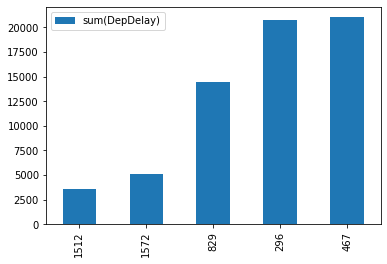

In [0]:
# Create a horizontal bar plot
x = df_pandas.loc[:5, "FlightNum"]
# y = df_pandas.loc[:5, 1]
df_pandas.loc[:4, :].plot(kind='bar')
# plt.xticks(x)
plt.xticks(range(0,5), x)
plt.show()

In [0]:
newDF.printSchema()

root
-- Year: string (nullable = true)
-- Month: string (nullable = true)
-- DayofMonth: string (nullable = true)
-- DayOfWeek: string (nullable = true)
-- DepTime: string (nullable = true)
-- CRSDepTime: string (nullable = true)
-- ArrTime: string (nullable = true)
-- CRSArrTime: string (nullable = true)
-- UniqueCarrier: string (nullable = true)
-- FlightNum: string (nullable = true)
-- TailNum: string (nullable = true)
-- ActualElapsedTime: string (nullable = true)
-- CRSElapsedTime: string (nullable = true)
-- AirTime: string (nullable = true)
-- ArrDelay: string (nullable = true)
-- DepDelay: string (nullable = true)
-- Origin: string (nullable = true)
-- Dest: string (nullable = true)
-- Distance: string (nullable = true)
-- TaxiIn: string (nullable = true)
-- TaxiOut: string (nullable = true)
-- Cancelled: string (nullable = true)
-- CancellationCode: string (nullable = true)
-- Diverted: string (nullable = true)
-- CarrierDelay: string (nullable = true)
-- WeatherDelay: string (nullable = true)
-- NASDelay: string (nullable = true)
-- SecurityDelay: string (nullable = true)
-- LateAircraftDelay: string (nullable = true)
-- IsArrDelayed: string (nullable = true)
-- IsDepDelayed: string (nullable = true)

In [0]:
# What was the average arrival delay per airline?
temp = newDF.groupBy(["FlightNum"]).avg("ArrDelay")
temp.show(n=5)

+---------+-----------------+
FlightNum| avg(ArrDelay)|
+---------+-----------------+
 1512|6.974459724950884|
 1572| 7.42463768115942|
 829| 8.71560236998025|
 296| 9.295|
 467|9.638405132905591|
+---------+-----------------+
only showing top 5 rows

In [0]:
# A. What was the average arrival delay per airline?

# B. Also, for each airline, on average did flights arrive early or late?

# Calculate the average arrival delay per airline. Then, add a column to this new dataframe (containing the grouped averages) that contains the string "Late" if the average arrival for that airline arrive >15 minutes late, "Early" if the average arrival is <0 minutes late, and "On-time" if the average arrival is between 0 and 15 minutes late.

# To add the additional column, use a Spark UDF. Additionally, make sure to filter out or fill in null values in your dataframe (if there are any) prior to applying the UDF.

#     What file format is airlines data stored in( It was stored in CSV format), and was this the most optimal format for the questions asked above?

# What format would you store this data in if you frequently queried only the UniqueCarr and CancellationCode columns?

# What if you frequently read entire rows of the dataset? 

<b>BABY NAMES DATASET 

This dataset comes from a website referenced by Data.gov. It lists baby names used in the state of NY from 2007 to 2012. 

 

Use Spark SQL's native JSON support to read the baby names file into a dataframe. Use this dataframe to create a temporary table containing all the nested data columns ("sid", "id", "position", "created_at", "created_meta", "updated_at", "updated_meta", "meta", "year", "first_name", "county", "sex", "count") so that they can be queried using SQL. 


Suggested Steps: 

Read in the JSON data from the following link:
  https://data.cityofnewyork.us/api/views/25th-nujf/rows.json?accessType=DOWNLOAD - you can download the dataset in json format and upload it in the databricks notebook before the next steps can be performed

Pull all columns in the nested data column to top level, following the schema specified above. There are built-in Spark SQL functions that will accomplish this. 

Create a temp table from this expanded dataframe using createOrReplaceTempView() – (15pts) 

 

Multiple Languages (10pts) 

Using the temp table you created in the question above, write a SQL query that gives the most popular baby name for each year in the dataset. Then, write the same query using either the Scala or Python dataframe APIs. 

 

Performance (10pts) 

Are there any performance considerations when choosing a language API (SQL vs Python vs Scala) in the context of Spark? 

 

Are there any performance considerations when using different data representations (RDD, Dataframe) in Spark? Please explain, and provide references if possible. No code answer is required. 

 

Nested XML (15pts) 

Imagine that a new upstream system now automatically adds an XML field to the JSON baby dataset. The added field is called visitors. It contains an XML string with visitor information for a given birth. We have simulated this upstream system by creating another JSON file with the additional field. 

 

Using the JSON dataset at https://raw.githubusercontent.com/jservin/scratch-pad/master/births-with-visitor-data.json, do the following: 

 

Read the rows-with-xml.json file into a dataframe and parse the nested XML fields into columns and print the total record count. 


Hint: the code below will read in the downloaded JSON files. However, the xml column needs to be given structure. Consider using a UDF. 

df = spark.read.option("inferSchema", True).json(userhome + "/births-with-visitor-data.json") 

 
 Hint for b,c,d: check for inconsistently capitalized field values. It will make your answer incorrect. 

Find the county with the highest average number of visitors across all births in that county 

Find the average visitor age for a birth in the county of KINGS 

Find the most common birth visitor age in the county of KINGS

In [0]:
# File location and type
file_location = "/FileStore/tables/births_with_visitor_data.json"
file_type = "json"

# CSV options
infer_schema = "false"
first_row_is_header = "false"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df)

county,created_at,first_name,id,meta,name_count,position,sex,sid,updated_at,visitors,year
KINGS,1574264158,ZOEY,00000000-0000-0000-0838-60C2FFCC43AE,{ },11,0,F,row-r9pv-p86t.ifsp,1574264158,"<?xml version=""1.0"" encoding=""utf-8""?>",2007
SUFFOLK,1574264158,ZOEY,00000000-0000-0000-C8FC-DDD3F9A72DFF,{ },6,0,F,row-7v2v~88z5-44se,1574264158,"<?xml version=""1.0"" encoding=""utf-8""?>",2007
MONROE,1574264158,ZOEY,00000000-0000-0000-562E-D9A0792557FC,{ },6,0,F,row-hzc9-4kvv~mbc9,1574264158,"<?xml version=""1.0"" encoding=""utf-8""?>",2007
ERIE,1574264158,ZOEY,00000000-0000-0000-B19D-7B88FF2FB6A0,{ },9,0,F,row-3473_8cwy~3vez,1574264158,"<?xml version=""1.0"" encoding=""utf-8""?>",2007
ULSTER,1574264158,ZOE,00000000-0000-0000-7D66-E7EC8F12BB8D,{ },5,0,F,row-tyuh.nmy9.r2n3,1574264158,"<?xml version=""1.0"" encoding=""utf-8""?>",2007
WESTCHESTER,1574264158,ZOE,00000000-0000-0000-7ECC-F350540A8F92,{ },24,0,F,row-ct48~ui69-2zsn,1574264158,"<?xml version=""1.0"" encoding=""utf-8""?>",2007
BRONX,1574264158,ZOE,00000000-0000-0000-30FB-CB5E36017AD5,{ },13,0,F,row-gdva~4v8k-vuwy,1574264158,"<?xml version=""1.0"" encoding=""utf-8""?>",2007
NEW YORK,1574264158,ZOE,00000000-0000-0000-E380-AAAB1FA5C7A7,{ },55,0,F,row-gzu3~a7hk~bqym,1574264158,"<?xml version=""1.0"" encoding=""utf-8""?>",2007
NASSAU,1574264158,ZOE,00000000-0000-0000-A7FF-8A4260B3A505,{ },15,0,F,row-ekbw_tb7c.yvgp,1574264158,"<?xml version=""1.0"" encoding=""utf-8""?>",2007
ERIE,1574264158,ZOE,00000000-0000-0000-3F7C-4DECA15E0F5B,{ },6,0,F,row-zk7s-r2ma_t8mk,1574264158,"<?xml version=""1.0"" encoding=""utf-8""?>",2007


In [0]:
# Create a view or table
temp_table_name = "baby_names"
df.createOrReplaceTempView(temp_table_name)

In [0]:
%sql 
select first_name, year
from (select year, first_name, count(*) as cnt,
             row_number() over (partition by year order by count(*) desc) as seqnum
     from baby_names
     group by year, first_name
    ) yn
where seqnum = 1;

first_name,year
JACOB,2007
JACOB,2008
JACOB,2009
ISABELLA,2010
MASON,2011
MASON,2012
EMMA,2013
EMMA,2014
EMMA,2015
EMMA,2016


In [0]:
df = df.withColumn("name_count", df.name_count.cast(IntegerType()))
temp = df.groupBy(["first_name", "year"]).sum("name_count")
df_pandas = temp.toPandas()
df_pandas.sort_values(['sum(name_count)'], ascending = False)

Out[33]:

,first_name,year,sum(name_count)
837,MICHAEL,2007,1815
1739,MICHAEL,2008,1652
3316,MICHAEL,2009,1630
287,MATTHEW,2007,1576
293,ANTHONY,2007,1517
...,...,...,...
9268,MADELYNN,2014,5
11448,RAEGAN,2016,5
4334,MARISA,2010,5
4337,ANNIKA,2011,5


In [0]:
# Question: Are there any performance considerations when using different data representations (RDD, Dataframe) in Spark? Please explain, and provide references if possible. No code answer is required.

# Answer:
# ======
# Scala programming language is 10 times faster than Python for data analysis and processing due to JVM. The performance is mediocre when Python programming code is used to make calls to Spark libraries but if there is lot of processing involved than Python code becomes much slower than the Scala equivalent code. Python interpreter PyPy has an in-built JIT (Just-In-Time) compiler which is very fast but it does not provide support for various Python C extensions. In such situations, the CPython interpreter with C extensions for libraries outperforms PyPy interpreter.

# RDD is slower than both Dataframes and Datasets to perform simple operations like grouping the data. It provides an easy API to perform aggregation operations. It performs aggregation faster than both RDDs and Datasets.

# References:
# 1. https://www.dezyre.com/article/scala-vs-python-for-apache-spark/213
# 2. https://stackoverflow.com/questions/32464122/spark-performance-for-scala-vs-python
# 3. https://www.analyticsvidhya.com/blog/2020/11/what-is-the-difference-between-rdds-dataframes-and-datasets/

In [0]:
# File location and type
file_location = "/FileStore/tables/births_with_visitor_data_2.json"
file_type = "json"

# CSV options
infer_schema = "false"
first_row_is_header = "false"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df)

county,created_at,first_name,id,meta,name_count,position,sex,sid,updated_at,visitors,year
KINGS,1574264158,ZOEY,00000000-0000-0000-0838-60C2FFCC43AE,{ },11,0,F,row-r9pv-p86t.ifsp,1574264158,"<?xml version=""1.0"" encoding=""utf-8""?>",2007
SUFFOLK,1574264158,ZOEY,00000000-0000-0000-C8FC-DDD3F9A72DFF,{ },6,0,F,row-7v2v~88z5-44se,1574264158,"<?xml version=""1.0"" encoding=""utf-8""?>",2007
MONROE,1574264158,ZOEY,00000000-0000-0000-562E-D9A0792557FC,{ },6,0,F,row-hzc9-4kvv~mbc9,1574264158,"<?xml version=""1.0"" encoding=""utf-8""?>",2007
ERIE,1574264158,ZOEY,00000000-0000-0000-B19D-7B88FF2FB6A0,{ },9,0,F,row-3473_8cwy~3vez,1574264158,"<?xml version=""1.0"" encoding=""utf-8""?>",2007
ULSTER,1574264158,ZOE,00000000-0000-0000-7D66-E7EC8F12BB8D,{ },5,0,F,row-tyuh.nmy9.r2n3,1574264158,"<?xml version=""1.0"" encoding=""utf-8""?>",2007
WESTCHESTER,1574264158,ZOE,00000000-0000-0000-7ECC-F350540A8F92,{ },24,0,F,row-ct48~ui69-2zsn,1574264158,"<?xml version=""1.0"" encoding=""utf-8""?>",2007
BRONX,1574264158,ZOE,00000000-0000-0000-30FB-CB5E36017AD5,{ },13,0,F,row-gdva~4v8k-vuwy,1574264158,"<?xml version=""1.0"" encoding=""utf-8""?>",2007
NEW YORK,1574264158,ZOE,00000000-0000-0000-E380-AAAB1FA5C7A7,{ },55,0,F,row-gzu3~a7hk~bqym,1574264158,"<?xml version=""1.0"" encoding=""utf-8""?>",2007
NASSAU,1574264158,ZOE,00000000-0000-0000-A7FF-8A4260B3A505,{ },15,0,F,row-ekbw_tb7c.yvgp,1574264158,"<?xml version=""1.0"" encoding=""utf-8""?>",2007
ERIE,1574264158,ZOE,00000000-0000-0000-3F7C-4DECA15E0F5B,{ },6,0,F,row-zk7s-r2ma_t8mk,1574264158,"<?xml version=""1.0"" encoding=""utf-8""?>",2007


In [0]:
# Find the county with the highest average number of visitors across all births in that county
# Find the average visitor age for a birth in the county of KINGS

# Find the most common birth visitor age in the county of KINGS

In [0]:
# 1. Copy helper functions from https://github.com/databricks/spark-xml#pyspark-notes

from pyspark.sql.column import Column, _to_java_column
from pyspark.sql.types import _parse_datatype_json_string
import pyspark.sql.functions as F

def ext_from_xml(xml_column, schema, options={}):
    java_column = _to_java_column(xml_column.cast('string'))
    java_schema = spark._jsparkSession.parseDataType(schema.json())
    scala_map = spark._jvm.org.apache.spark.api.python.PythonUtils.toScalaMap(options)
    jc = spark._jvm.com.databricks.spark.xml.functions.from_xml(
        java_column, java_schema, scala_map)
    return Column(jc)

def ext_schema_of_xml_df(df, options={}):
    assert len(df.columns) == 1

    scala_options = spark._jvm.PythonUtils.toScalaMap(options)
    java_xml_module = getattr(getattr(
        spark._jvm.com.databricks.spark.xml, "package$"), "MODULE$")
    java_schema = java_xml_module.schema_of_xml_df(df._jdf, scala_options)
    return _parse_datatype_json_string(java_schema.json())

# 2. Set up example dataframe

# xml = '<?xml version="1.0" encoding="utf-8"?> <visitors> <visitor id="9615" age="68" sex="F" /> <visitor id="1882" age="34" sex="M" /> <visitor id="5987" age="23" sex="M" /> </visitors>'

# df = spark.createDataFrame([('1',xml)],['id','visitors'])
# df.show()

# # +---+--------------------+
# # | id|            visitors|
# # +---+--------------------+
# # |  1|<?xml version="1....|
# # +---+--------------------+

# 3. Get xml schema and parse xml column

payloadSchema = ext_schema_of_xml_df(df.select("visitors"))
parsed = df.withColumn("parsed", ext_from_xml(F.col("visitors"), payloadSchema))
parsed.show()

--------------------------------------------------------------------------- 
 TypeError Traceback (most recent call last)
 <command-4016925748216181> in <module> 
 38 # 3. Get xml schema and parse xml column 
 39 
 ---> 40 payloadSchema = ext_schema_of_xml_df ( df . select ( "visitors" ) ) 
 41 parsed = df . withColumn ( "parsed" , ext_from_xml ( F . col ( "visitors" ) , payloadSchema ) ) 
 42 parsed . show ( ) 

 <command-4016925748216181> in ext_schema_of_xml_df (df, options) 
 20 java_xml_module = getattr(getattr(
 21 spark._jvm.com.databricks.spark.xml, "package$"), "MODULE$")
 ---> 22 java_schema = java_xml_module . schema_of_xml_df ( df . _jdf , scala_options ) 
 23 return _parse_datatype_json_string ( java_schema . json ( ) ) 
 24 

 TypeError : 'JavaPackage' object is not callable

In [0]:
# 4. Extract 'visitor' field from StructType
df2 = parsed.select(*parsed.columns[:-1],F.explode(F.col('parsed').getItem('visitor')))
df2.show()

# +---+--------------------+---------------+
# | id|            visitors|            col|
# +---+--------------------+---------------+
# |  1|<?xml version="1....|[, 68, 9615, F]|
# |  1|<?xml version="1....|[, 34, 1882, M]|
# |  1|<?xml version="1....|[, 23, 5987, M]|
# +---+--------------------+---------------+

# 5. Get field names, which will become new columns
# (there's probably a much better way of doing this :D)
new_col_names = [s.split(':')[0] for s in payloadSchema['visitor'].simpleString().split('<')[-1].strip('>>').split(',')]

new_col_names

# ['_VALUE', '_age', '_id', '_sex']

# 6. Create new columns

for c in new_col_names:
    df2 = df2.withColumn(c, F.col('col').getItem(c))
    
df2 = df2.drop('col','_VALUE')

df2.show()

<b>ML Question 1 [20 Points] 

Choose a data set then demonstrate the training and testing of a Spark MLlib algorithm. You may use any dataset contained in dbfs:/databricks-datasets, or you may use a publically available dataset of your choice. However, if you choose a public data set, please ensure your code downloads the dataset from a publically available source. The grader needs to be able to run all your code. Please cite any sources/guides/blogs used. 

 

Show and discuss an example of using hyperparameter tuning on the algorithm to improve prediction accuracy. Please describe in detail what algorithm you chose and why. 

 

Note: Blogs and tutorials can be used to inform you in writing your answer, but if your code is copied from the blog or tutorial then your answer will be worth at most half-credit.

# Movie Lens 20M Dataset

In [0]:
# Getting the data

# It is already mounted for us

import os
# from databricks_test_helper import Test

dbfs_dir = '/databricks-datasets/cs110x/ml-20m/data-001'

#We will use these 2 files for our analysis and collabrative filtering
ratings_filename = dbfs_dir + '/ratings.csv' 
movies_filename = dbfs_dir + '/movies.csv'

#This is a databricks feature
display(dbutils.fs.ls(dbfs_dir))


path,name,size
dbfs:/databricks-datasets/cs110x/ml-20m/data-001/README.txt,README.txt,8964
dbfs:/databricks-datasets/cs110x/ml-20m/data-001/links.csv,links.csv,569517
dbfs:/databricks-datasets/cs110x/ml-20m/data-001/links.csv.gz,links.csv.gz,245973
dbfs:/databricks-datasets/cs110x/ml-20m/data-001/movies.csv,movies.csv,1397542
dbfs:/databricks-datasets/cs110x/ml-20m/data-001/movies.csv.gz,movies.csv.gz,498839
dbfs:/databricks-datasets/cs110x/ml-20m/data-001/ratings.csv,ratings.csv,533444411
dbfs:/databricks-datasets/cs110x/ml-20m/data-001/ratings.csv.gz,ratings.csv.gz,132656084
dbfs:/databricks-datasets/cs110x/ml-20m/data-001/tags.csv,tags.csv,16603996
dbfs:/databricks-datasets/cs110x/ml-20m/data-001/tags.csv.gz,tags.csv.gz,4787917


### A Little analysis on the movies.csv

We will create 2 dataframes for our analysis:

    movies_based_on_time - We will drop the genres here final schema will be (movie_id,name, Year)
    movies_based_on_genres - Final schema would look like (movie_id,name_with_year,one_genre)

In [0]:
from pyspark.sql.types import *
#working only on movies.csv right now
movies_with_genres_df_schema = StructType(
  [StructField('ID', IntegerType()),
   StructField('title', StringType()),
   StructField('genres',StringType())]
  )

movies_df_schema = StructType(
  [StructField('ID', IntegerType()),
   StructField('title', StringType())]
  ) #dropping the genres.Also, we will tranform the df to include the Year later

In [0]:
#Creating the dataframes 
movies_df = sqlContext.read.format('com.databricks.spark.csv').options(header=True, inferSchema=False).schema(movies_df_schema).load(movies_filename)
movies_with_genres_df = sqlContext.read.format('com.databricks.spark.csv').options(header=True, inferSchema=False).schema(movies_with_genres_df_schema).load(movies_filename)

In [0]:
movies_df.show(4,truncate = False) #we will also use this for Collabrative filtering
movies_with_genres_df.show(4,truncate = False)


+---+------------------------+
ID |title |
+---+------------------------+
1 |Toy Story (1995) |
2 |Jumanji (1995) |
3 |Grumpier Old Men (1995) |
4 |Waiting to Exhale (1995)|
+---+------------------------+
only showing top 4 rows

+---+------------------------+-------------------------------------------+
ID |title |genres |
+---+------------------------+-------------------------------------------+
1 |Toy Story (1995) |Adventure|Animation|Children|Comedy|Fantasy|
2 |Jumanji (1995) |Adventure|Children|Fantasy |
3 |Grumpier Old Men (1995) |Comedy|Romance |
4 |Waiting to Exhale (1995)|Comedy|Drama|Romance |
+---+------------------------+-------------------------------------------+
only showing top 4 rows

In [0]:

#transforming the Dataframes
from pyspark.sql.functions import split, regexp_extract, explode

# Side note a very nice quote -- Some people, when confronted with a problem, think "I know, I'll use regular expressions." Now they have two problems.(attributed to Jamie #Zawinski)
movies_with_year_df = movies_df.select('ID','title',regexp_extract('title',r'\((\d+)\)',1).alias('year'))


# split_col = split(movies_with_genres_df['genres'], '|')
# movies_with_one_genre_df = movies_with_genres_df.withColumn('Genre1', split_col.getItem(1))

# movies_with_one_genre_df = sqlContext.createDataFrame(movies_with_genres_df.select(split(movies_with_genres_df.genres,"|")).rdd.flatMap(
#               lambda x: x)).toDF("Id","title","Genre1")



In [0]:
movies_with_one_genre_df = movies_with_genres_df.withColumn("Genre1", split("genres", "[|]")[0])
# movies_with_genres_df.withColumn("Genre1", explode(split("genres", "[|]"))).show()

In [0]:
movies_with_one_genre_df.show(10,truncate = False)
movies_with_year_df.show(4,truncate = False)

+---+----------------------------------+-------------------------------------------+---------+
ID |title |genres |Genre1 |
+---+----------------------------------+-------------------------------------------+---------+
1 |Toy Story (1995) |Adventure|Animation|Children|Comedy|Fantasy|Adventure|
2 |Jumanji (1995) |Adventure|Children|Fantasy |Adventure|
3 |Grumpier Old Men (1995) |Comedy|Romance |Comedy |
4 |Waiting to Exhale (1995) |Comedy|Drama|Romance |Comedy |
5 |Father of the Bride Part II (1995)|Comedy |Comedy |
6 |Heat (1995) |Action|Crime|Thriller |Action |
7 |Sabrina (1995) |Comedy|Romance |Comedy |
8 |Tom and Huck (1995) |Adventure|Children |Adventure|
9 |Sudden Death (1995) |Action |Action |
10 |GoldenEye (1995) |Action|Adventure|Thriller |Action |
+---+----------------------------------+-------------------------------------------+---------+
only showing top 10 rows

+---+------------------------+----+
ID |title |year|
+---+------------------------+----+
1 |Toy Story (1995) |1995|
2 |Jumanji (1995) |1995|
3 |Grumpier Old Men (1995) |1995|
4 |Waiting to Exhale (1995)|1995|
+---+------------------------+----+
only showing top 4 rows

In [0]:
display(movies_with_one_genre_df.groupBy('Genre1').count()) #people love drama

#Below we have a bar chart here we can choose from a lot of other options

Genre1,count
Crime,1617
Romance,145
Thriller,279
Adventure,1357
Drama,7875
War,35
Documentary,2247
Fantasy,137
Mystery,146
Musical,94


In [0]:
# Now let's move to Ratings

# We already have the movie_df now we will require ratings Lets create the Dataframe

#again for avoiding the action we are explicitly defining the schema
ratings_df_schema = StructType(
  [StructField('userId', IntegerType()),
   StructField('movieId', IntegerType()),
   StructField('rating', DoubleType())]
)              #we are dropping the Time Stamp column


In [0]:
#creating the df
ratings_df = sqlContext.read.format('com.databricks.spark.csv').options(header=True, inferSchema=False).schema(ratings_df_schema).load(ratings_filename)
ratings_df.show(4)

+------+-------+------+
userId|movieId|rating|
+------+-------+------+
 1| 2| 3.5|
 1| 29| 3.5|
 1| 32| 3.5|
 1| 47| 3.5|
+------+-------+------+
only showing top 4 rows

In [0]:
#We will cache both the dataframes
ratings_df.cache()
movies_df.cache()
print ("both dataframes are in cache now for easy accessibility")

both dataframes are in cache now for easy accessibility

In [0]:
from pyspark.sql import functions as F

# From ratingsDF, create a movie_ids_with_avg_ratings_df that combines the two DataFrames
movie_ids_with_avg_ratings_df = ratings_df.groupBy('movieId').agg(F.count(ratings_df.rating).alias("count"), F.avg(ratings_df.rating).alias("average"))
print ('movie_ids_with_avg_ratings_df:')
movie_ids_with_avg_ratings_df.show(4, truncate=False)

movie_ids_with_avg_ratings_df:
+-------+-----+------------------+
movieId|count|average |
+-------+-----+------------------+
3997 |2047 |2.0703468490473864|
1580 |35580|3.55831928049466 |
3918 |1246 |2.918940609951846 |
2366 |6627 |3.5492681454655197|
+-------+-----+------------------+
only showing top 4 rows

In [0]:
#this df will have names with movie_id- Make it more understandable
movie_names_with_avg_ratings_df = movie_ids_with_avg_ratings_df.join(movies_df,F.col('movieID') == F.col('ID')).drop('ID')
movie_names_with_avg_ratings_df.show(4,truncate = False)

+-------+-----+------------------+--------------------------------+
movieId|count|average |title |
+-------+-----+------------------+--------------------------------+
3997 |2047 |2.0703468490473864|Dungeons & Dragons (2000) |
1580 |35580|3.55831928049466 |Men in Black (a.k.a. MIB) (1997)|
3918 |1246 |2.918940609951846 |Hellbound: Hellraiser II (1988) |
2366 |6627 |3.5492681454655197|King Kong (1933) |
+-------+-----+------------------+--------------------------------+
only showing top 4 rows

In [0]:
#so let us see the global popularity
movies_with_500_ratings_or_more = movie_names_with_avg_ratings_df.filter(movie_names_with_avg_ratings_df['count'] >= 500).orderBy('average',ascending = False)
movies_with_500_ratings_or_more.show(truncate = False)

+-------+-----+------------------+---------------------------------------------------------------------------+
movieId|count|average |title |
+-------+-----+------------------+---------------------------------------------------------------------------+
318 |63366|4.446990499637029 |Shawshank Redemption, The (1994) |
858 |41355|4.364732196832306 |Godfather, The (1972) |
50 |47006|4.334372207803259 |Usual Suspects, The (1995) |
527 |50054|4.310175010988133 |Schindler's List (1993) |
1221 |27398|4.275640557704942 |Godfather: Part II, The (1974) |
2019 |11611|4.2741796572216 |Seven Samurai (Shichinin no samurai) (1954) |
904 |17449|4.271333600779414 |Rear Window (1954) |
7502 |4305 |4.263182346109176 |Band of Brothers (2001) |
912 |24349|4.258326830670664 |Casablanca (1942) |
922 |6525 |4.256934865900383 |Sunset Blvd. (a.k.a. Sunset Boulevard) (1950) |
1193 |29932|4.24807897901911 |One Flew Over the Cuckoo's Nest (1975) |
750 |23220|4.247286821705426 |Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)|
1212 |6565 |4.246001523229246 |Third Man, The (1949) |
6016 |12937|4.235410064157069 |City of God (Cidade de Deus) (2002) |
44555 |5720 |4.2347902097902095|Lives of Others, The (Das leben der Anderen) (2006) |
908 |15627|4.233538107122288 |North by Northwest (1959) |
1178 |3568 |4.2326233183856505|Paths of Glory (1957) |
2959 |40106|4.227123123722136 |Fight Club (1999) |
3435 |4909 |4.224281931146873 |Double Indemnity (1944) |
1203 |12934|4.224137931034483 |12 Angry Men (1957) |
+-------+-----+------------------+---------------------------------------------------------------------------+
only showing top 20 rows

In [0]:
# Splitting in Train, Test and Validation dataset

# As with all the Machine Learning Algorithms in practice we have to tune parameters and then test accuracy.For this we will split the data into 3 parts Train, Test(Checking the final accuracy) and Validation(optimizing hyperparameters) data. For more information about this brilliant lecture by Nando

# We'll hold out 60% for training, 20% of our data for validation, and leave 20% for testing
seed = 4
(split_60_df, split_a_20_df, split_b_20_df) = ratings_df.randomSplit([0.6,0.2,0.2],seed)

# Let's cache these datasets for performance
training_df = split_60_df.cache()
validation_df = split_a_20_df.cache()
test_df = split_b_20_df.cache()

print('Training: {0}, validation: {1}, test: {2}\n'.format(
  training_df.count(), validation_df.count(), test_df.count())
)
training_df.show(4,truncate = False)
validation_df.show(4,truncate = False)
test_df.show(4,truncate = False)


Training: 11997031, validation: 4003826, test: 3999406

+------+-------+------+
userId|movieId|rating|
+------+-------+------+
1 |29 |3.5 |
1 |32 |3.5 |
1 |47 |3.5 |
1 |50 |3.5 |
+------+-------+------+
only showing top 4 rows

+------+-------+------+
userId|movieId|rating|
+------+-------+------+
1 |260 |4.0 |
1 |318 |4.0 |
1 |541 |4.0 |
1 |589 |3.5 |
+------+-------+------+
only showing top 4 rows

+------+-------+------+
userId|movieId|rating|
+------+-------+------+
1 |2 |3.5 |
1 |223 |4.0 |
1 |367 |3.5 |
1 |924 |3.5 |
+------+-------+------+
only showing top 4 rows

## Alternating Least Square (ALS)

In [0]:
from pyspark.ml.recommendation import ALS

# our ALS learner
als = ALS()

# Now we set the parameters for the method
als.setMaxIter(5)\
   .setSeed(seed)\
   .setRegParam(0.1)\
   .setUserCol('userId')\
   .setItemCol('movieId')\
   .setRatingCol('rating')

# Now let's compute an evaluation metric for our test and validation dataset
from pyspark.ml.evaluation import RegressionEvaluator

# Create an RMSE evaluator using the label and predicted columns
#it will essentially calculate the rmse score based on these columns
reg_eval = RegressionEvaluator(predictionCol="prediction", labelCol="rating", metricName="rmse")

tolerance = 0.03

#Now to understand rank let us initially assume that my recommendation matrix is 1000 * 1000 (1000 users and 1000 products this is a very sparse matrix)
#Now what we do is we get 2 matrices P (shape 1000 * rank) and Q (shape rank * 1000) so essentially now if we multiply them I get the same but now the storage has decreased from storing 1000 * 1000 numbers to 2 * 1000 * rank (for rank = 4 we only need 8000 numbers compared to 1000000)  
ranks = [4, 8, 12] 
errors = [0, 0, 0]
models = [0, 0, 0]
err = 0
min_error = float('inf')
best_rank = -1
for rank in ranks:
  # Set the rank here:
  als.setRank(rank)
  # Create the model with these parameters.
  model = als.fit(training_df)
  # Run the model to create a prediction. Predict against the validation_df.
  predict_df = model.transform(validation_df)

  # Remove NaN values from prediction (due to SPARK-14489)
  predicted_ratings_df = predict_df.filter(predict_df.prediction != float('nan'))

  # Run the previously created RMSE evaluator, reg_eval, on the predicted_ratings_df DataFrame
  error = reg_eval.evaluate(predicted_ratings_df)
  errors[err] = error
  models[err] = model
  print ('For rank %s the RMSE is %s' % (rank, error))
  if error < min_error:
    min_error = error
    best_rank = err
  err += 1

als.setRank(ranks[best_rank])
print ('The best model was trained with rank %s' % ranks[best_rank])
my_model = models[best_rank]

For rank 4 the RMSE is 0.8231040295542384
For rank 8 the RMSE is 0.8148873227233515
For rank 12 the RMSE is 0.8301578759601524
The best model was trained with rank 8

### Testing our Model

#### Again we will filter out where the prediction is NaN

In [0]:
predict_df = my_model.transform(test_df)

# Remove NaN values from prediction (due to SPARK-14489)
predicted_test_df = predict_df.filter(predict_df.prediction != float('nan'))

# Run the previously created RMSE evaluator, reg_eval, on the predicted_test_df DataFrame
test_RMSE = reg_eval.evaluate(predicted_test_df)

print('The model had a RMSE on the test set of {0}'.format(test_RMSE))


The model had a RMSE on the test set of 0.8142072910528864

#### Prediction based on our watched Movies

In [0]:
#lets look at the top movies because there would be high chance if I have seen them
display(movies_with_500_ratings_or_more)

movieId,count,average,title
318,63366,4.446990499637029,"Shawshank Redemption, The (1994)"
858,41355,4.364732196832306,"Godfather, The (1972)"
50,47006,4.334372207803259,"Usual Suspects, The (1995)"
527,50054,4.310175010988133,Schindler's List (1993)
1221,27398,4.275640557704942,"Godfather: Part II, The (1974)"
2019,11611,4.2741796572216,Seven Samurai (Shichinin no samurai) (1954)
904,17449,4.271333600779414,Rear Window (1954)
7502,4305,4.263182346109176,Band of Brothers (2001)
912,24349,4.258326830670664,Casablanca (1942)
922,6525,4.256934865900383,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
